In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, minmax_scale,robust_scale
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
#import pydotplus
#import graphviz
from statistics import median, mean

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score

In [10]:
df = pd.read_csv("bank-full.csv")
df.head(2)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [21]:
df.shape

(45211, 17)

In [22]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [23]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [25]:
df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']] = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']].apply(pd.Categorical)

In [26]:
df.dtypes.to_frame("new project")

,new project
age,int64
job,category
marital,category
education,category
default,category
balance,int64
housing,category
loan,category
contact,category
day,int64


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


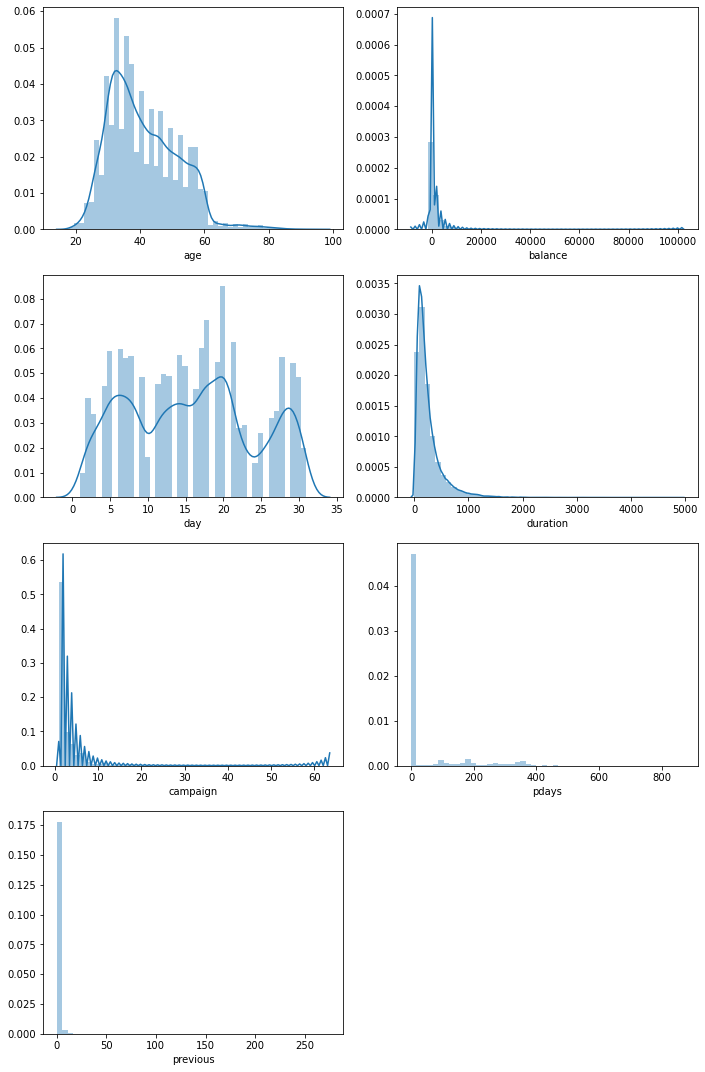

In [31]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize = (10,15))
axe = axe.flatten()
sns.distplot(df['age'], ax = axe[0])
sns.distplot(df['balance'], ax=axe[1])
sns.distplot(df['day'], ax = axe[2])
sns.distplot(df['duration'], ax = axe[3])
sns.distplot(df['campaign'], ax=axe[4])
sns.distplot(df['pdays'], ax=axe[5])
sns.distplot(df['previous'], ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

IndexError: index 8 is out of bounds for axis 0 with size 8

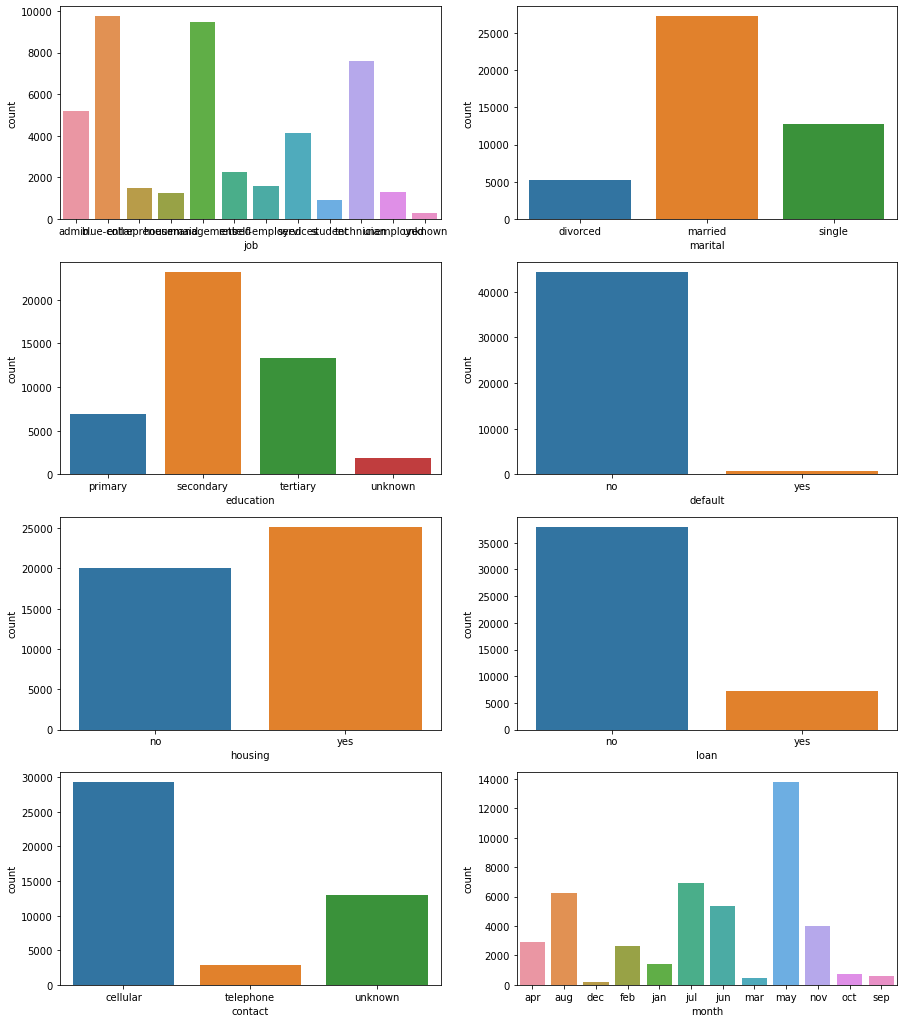

In [43]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize = (15,18))
axe = axe.flatten()

plot = sns.countplot(x = df['job'], data = df, ax = axe[0])
#plt.set(plt.get_figlabels(),rotation = 90)

sns.countplot(x = df['marital'], data=df, ax=axe[1])
sns.countplot(x = df['education'], data=df, ax=axe[2])
sns.countplot(x = df['default'], data=df, ax=axe[3])
sns.countplot(x = df['housing'], data=df, ax=axe[4])
sns.countplot(x = df['loan'], data=df, ax=axe[5])
sns.countplot(x = df['contact'], data=df, ax=axe[6])
sns.countplot(x = df['month'], data=df, ax=axe[7])
sns.countplot(x = df['poutcome'], data=df, ax=axe[8])
sns.countplot(x = df['Target'], data=df, ax=axe[9])


fig.tight_layout()
fig.show()

In [45]:
df.skew().to_frame("skewness measure")

,skewness measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


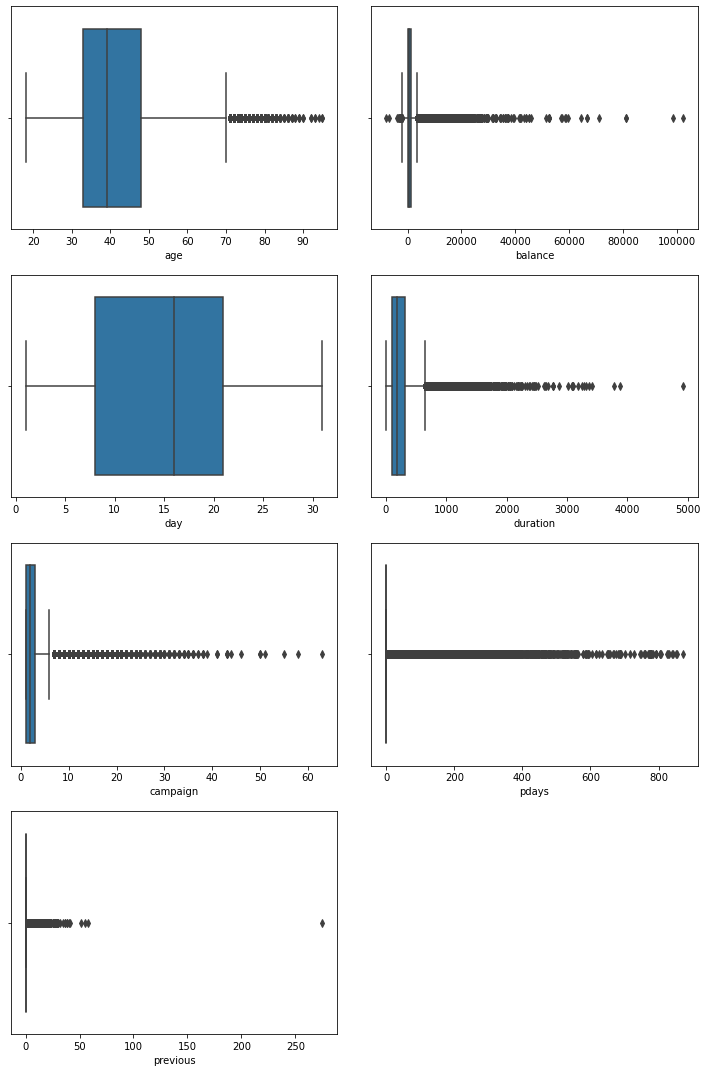

In [46]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize = (10,15))
axe = axe.flatten()

sns.boxplot(x='age', data=df, ax=axe[0])
sns.boxplot(x='balance', data=df, ax=axe[1])
sns.boxplot(x='day', data=df, ax=axe[2])
sns.boxplot(x='duration', data=df, ax=axe[3])
sns.boxplot(x='campaign', data=df, ax=axe[4])
sns.boxplot(x='pdays', data=df, ax=axe[5])
sns.boxplot(x='previous', data=df, ax=axe[6])


fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

In [47]:
df['Target'].value_counts().to_frame("Target colm distribution")

,Target colm distribution
no,39922
yes,5289


In [53]:
df.dtypes.to_frame("new project")

,new project
age,int64
job,category
marital,category
education,category
default,category
balance,int64
housing,category
loan,category
contact,category
day,int64


In [56]:
df1 = df.copy()
encoder = LabelEncoder()
df1["default"] = encoder.fit_transform(df['default']).astype(int)
df1["marital"] = encoder.fit_transform(df['marital']).astype(int)
df1["loan"] = encoder.fit_transform(df['loan']).astype(int)
df1["housing"] = encoder.fit_transform(df['housing']).astype(int)
df1["Target"] = encoder.fit_transform(df['Target']).astype(int)
df1["month"] = encoder.fit_transform(df['month']).astype(int)
df1["poutcome"] = encoder.fit_transform(df['poutcome']).astype(int)
df1["education"] = encoder.fit_transform(df['education']).astype(int)

df1.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,1,2,1,1,2
education,2,1,1,3,3
default,0,0,0,0,0
balance,2143,29,2,1506,1
housing,1,1,1,1,0
loan,0,0,1,0,0
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [59]:
df1[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']] = df1[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']].apply(pd.Categorical)

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [61]:
meanbal=float(df1['balance'].mean())
df1['balance']=np.where(df1['balance']>np.percentile(df1['balance'], 75), meanbal, df1['balance'])


In [62]:
meanbal=float(df1['duration'].mean())
df1['duration']=np.where(df1['duration']>np.percentile(df1['duration'], 75), meanbal, df1['duration'])


In [63]:
meanbal=float(df1['campaign'].mean())
df1['campaign']=np.where(df1['campaign']>np.percentile(df1['campaign'], 75), meanbal, df1['campaign'])


In [64]:
meanbal=float(df1['pdays'].mean())
df1['pdays']=np.where(df1['pdays']>np.percentile(df1['pdays'], 75), meanbal, df1['pdays'])


In [65]:
meanbal=float(df1['previous'].mean())
df1['previous']=np.where(df1['previous']>np.percentile(df1['previous'], 75), meanbal, df1['previous'])


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


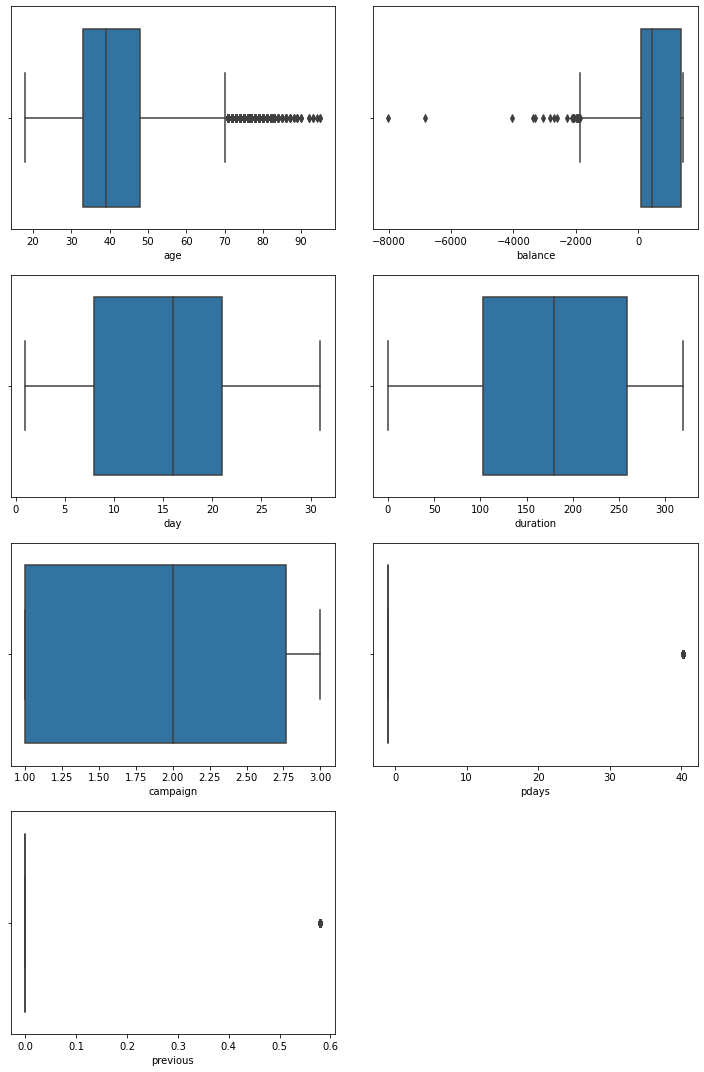

In [67]:
#after removing outlayers

fig, axe = plt.subplots(nrows=4, ncols=2, figsize = (10,15))
axe = axe.flatten()

sns.boxplot(x='age', data=df1, ax=axe[0])
sns.boxplot(x='balance', data=df1, ax=axe[1])
sns.boxplot(x='day', data=df1, ax=axe[2])
sns.boxplot(x='duration', data=df1, ax=axe[3])
sns.boxplot(x='campaign', data=df1, ax=axe[4])
sns.boxplot(x='pdays', data=df1, ax=axe[5])
sns.boxplot(x='previous', data=df1, ax=axe[6])


fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

<AxesSubplot:>

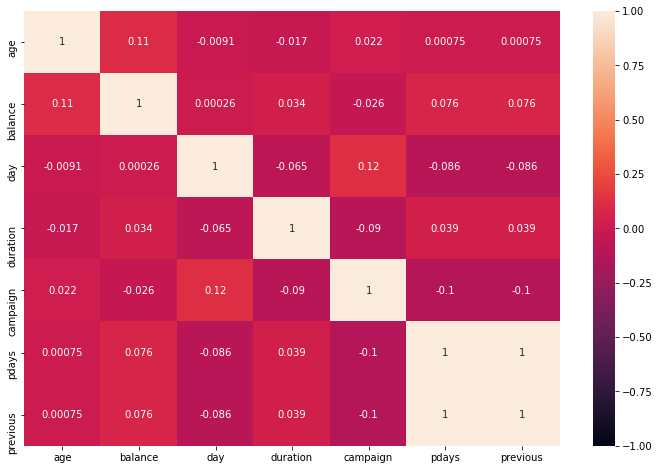

In [69]:
#correlation plot after removing outliers 

plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True, vmax=1, vmin=-1)

<AxesSubplot:>

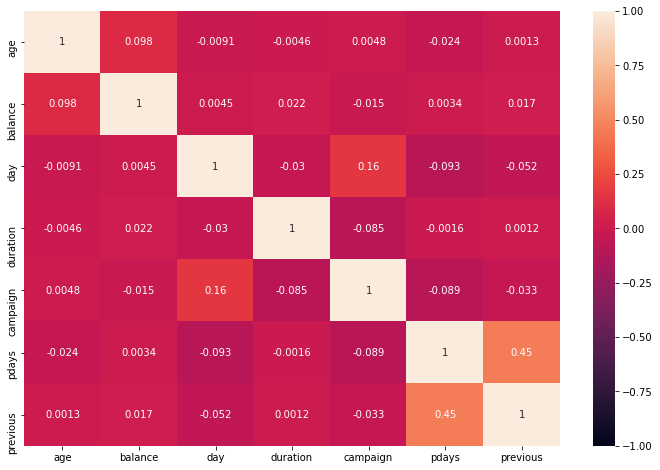

In [70]:
#correlation plot before removing outliers 

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1)

In [71]:
df2 = df1.drop(['job', 'education', 'contact', 'duration', 'pdays', 'day', 'month'], axis=1)
df2.head(2)

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0


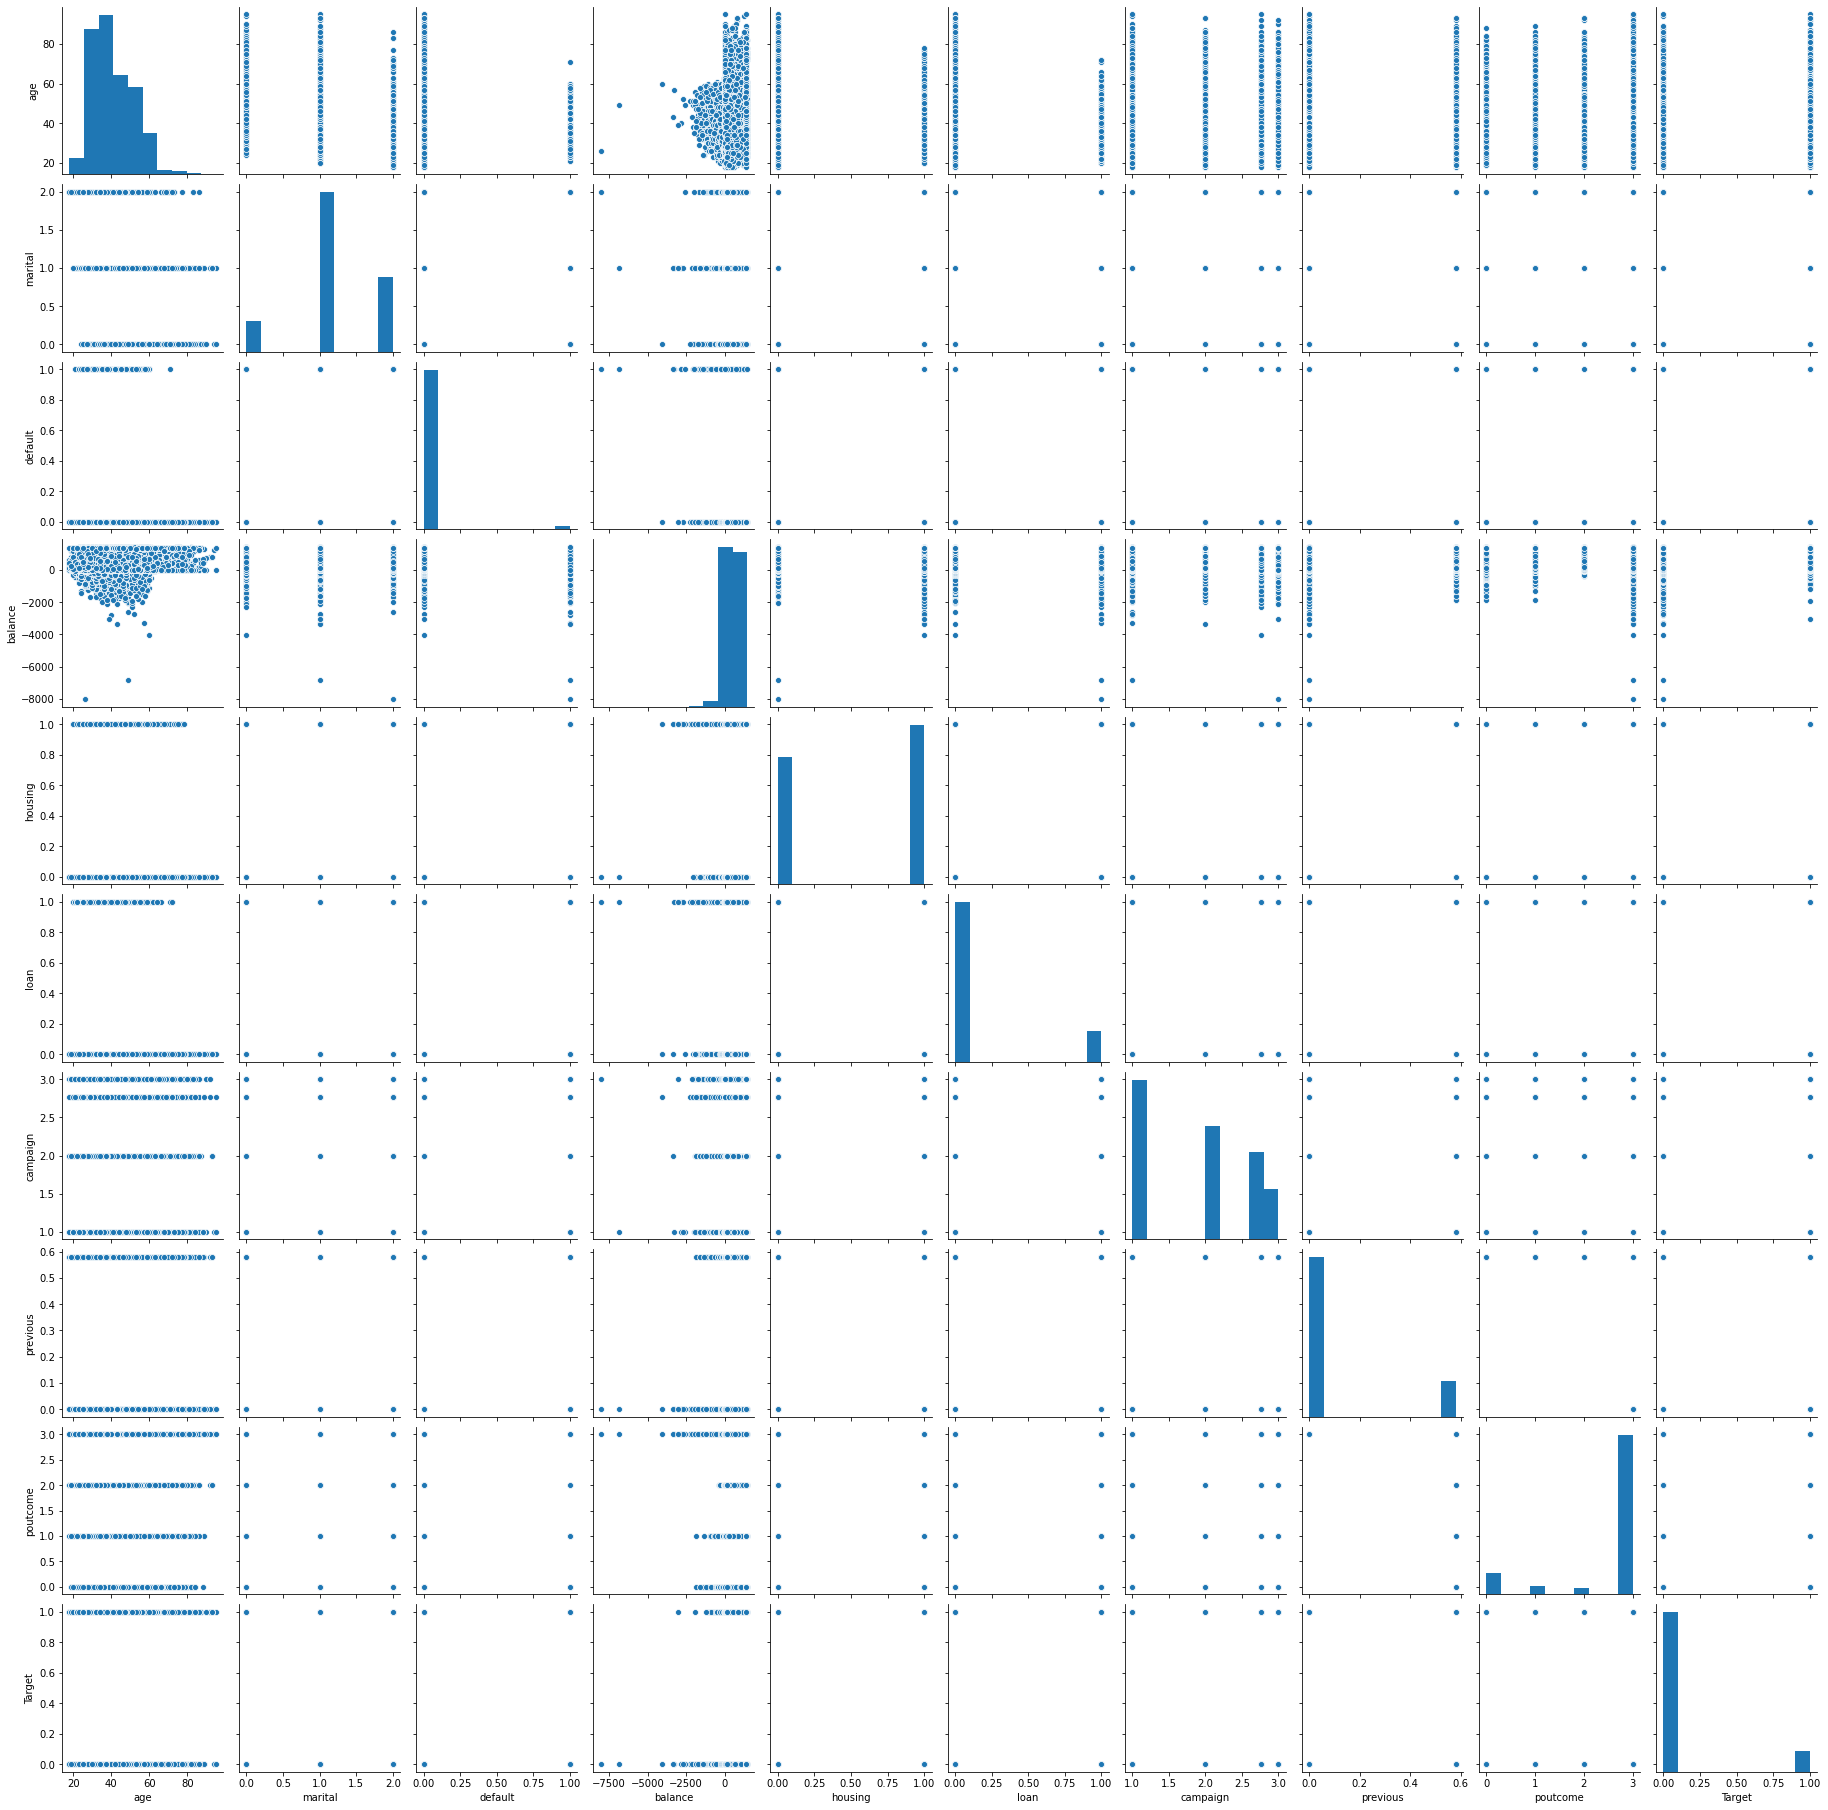

In [73]:
sns.pairplot(df2)

In [76]:
#train the model
x = df2.drop('Target', axis=1)
y = df2['Target']
print(x)
print(y)

       age marital default      balance housing loan  campaign  previous  \
0       58       1       0  1362.272058       1    0  1.000000  0.000000   
1       44       2       0    29.000000       1    0  1.000000  0.000000   
2       33       1       0     2.000000       1    1  1.000000  0.000000   
3       47       1       0  1362.272058       1    0  1.000000  0.000000   
4       33       2       0     1.000000       0    0  1.000000  0.000000   
...    ...     ...     ...          ...     ...  ...       ...       ...   
45206   51       1       0   825.000000       0    0  3.000000  0.000000   
45207   71       0       0  1362.272058       0    0  2.000000  0.000000   
45208   72       1       0  1362.272058       0    0  2.763841  0.580323   
45209   57       1       0   668.000000       0    0  2.763841  0.000000   
45210   37       1       0  1362.272058       0    0  2.000000  0.580323   

      poutcome  
0            3  
1            3  
2            3  
3            3  
4 

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)


In [79]:
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)


In [83]:
#model

logic_r = LogisticRegression(solver="liblinear")
logic_r.fit(x_train_scaled, y_train)
y_pred = logic_r.predict(x_test_scaled)
LR_acc = accuracy_score(y_test, y_pred)
print("the confusion_matrix\n", confusion_matrix(y_test, y_pred))
print("the accuraccy score\n", LR_acc*100)
print("the classification report\n", classification_report(y_test, y_pred))


the confusion_matrix
 [[11892   107]
 [ 1318   247]]
the accuraccy score
 89.49424948392804
the classification report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.16      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



In [86]:
#navie bayes model
NB = GaussianNB()
NB.fit(x_train_scaled, y_train)
y_predi = NB.predict(x_test_scaled)
nav_acc = accuracy_score(y_test, y_predi)
print("the confusion_matrix\n", confusion_matrix(y_test, y_predi))
print("the accuraccy score\n", nav_acc*100)
print("the classification report\n", classification_report(y_test, y_predi))

the confusion_matrix
 [[10667  1332]
 [ 1055   510]]
the accuraccy score
 82.40194632851666
the classification report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11999
           1       0.28      0.33      0.30      1565

    accuracy                           0.82     13564
   macro avg       0.59      0.61      0.60     13564
weighted avg       0.84      0.82      0.83     13564



In [87]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)
knn_acc = accuracy_score(y_test, y_pred)
print("the confusion_matrix\n", confusion_matrix(y_test, y_pred))
print("the accuraccy score\n", knn_acc*100)
print("the classification report\n", classification_report(y_test, y_pred))

the confusion_matrix
 [[11465   534]
 [ 1236   329]]
the accuraccy score
 86.95075199056326
the classification report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.38      0.21      0.27      1565

    accuracy                           0.87     13564
   macro avg       0.64      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



In [88]:
svc = SVC()
svc.fit(x_train_scaled, y_train)
y_pred = svc.predict(x_test_scaled)
svc_acc = accuracy_score(y_test, y_pred)
print("the confusion_matrix\n", confusion_matrix(y_test, y_pred))
print("the accuraccy score\n", svc_acc*100)
print("the classification report\n", classification_report(y_test, y_pred))

the confusion_matrix
 [[11856   143]
 [ 1287   278]]
the accuraccy score
 89.45738720141551
the classification report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.66      0.18      0.28      1565

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



In [89]:
#decision tree
dtree = DecisionTreeClassifier(criterion='gini', random_state=1)
dtree.fit(x_train_scaled, y_train)
y_pred = dtree.predict(x_test_scaled)
dtree_acc = accuracy_score(y_test, y_pred)
print("the confusion_matrix\n", confusion_matrix(y_test, y_pred))
print("the accuraccy score\n", dtree_acc*100)
print("the classification report\n", classification_report(y_test, y_pred))

the confusion_matrix
 [[10820  1179]
 [ 1184   381]]
the accuraccy score
 82.57888528457681
the classification report
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     11999
           1       0.24      0.24      0.24      1565

    accuracy                           0.83     13564
   macro avg       0.57      0.57      0.57     13564
weighted avg       0.83      0.83      0.83     13564



In [92]:
#bagging model
bagc = BaggingClassifier(base_estimator=dtree, n_estimators=500, random_state=1)
bagc.fit(x_train_scaled, y_train)
bagc_pred = bagc.predict(x_test_scaled)
bagc_acc = accuracy_score(y_test, bagc_pred)
print("the confusion_matrix\n", confusion_matrix(y_test, bagc_pred))
print("the accuraccy score\n", bagc_acc*100)
print("the classification report\n", classification_report(y_test, bagc_pred))

the confusion_matrix
 [[11547   452]
 [ 1230   335]]
the accuraccy score
 87.59952816278384
the classification report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.43      0.21      0.28      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



In [93]:
# adaptive boosting model
adab = AdaBoostClassifier(n_estimators=50, random_state=1)
adab.fit(x_train_scaled, y_train)
adab_pred = adab.predict(x_test_scaled)
adab_acc = accuracy_score(y_test, adab_pred)
print("the confusion_matrix\n", confusion_matrix(y_test, adab_pred))
print("the accuraccy score\n", adab_acc*100)
print("the classification report\n", classification_report(y_test, adab_pred))

the confusion_matrix
 [[11885   114]
 [ 1324   241]]
the accuraccy score
 89.39840754939546
the classification report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.68      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



In [95]:
#random forest ensemble
randf = RandomForestClassifier(n_estimators=100, random_state=2, max_features=3)
randf.fit(x_train_scaled, y_train)
randf_pred = randf.predict(x_test_scaled)
randf_acc = accuracy_score(y_test, randf_pred)
print("the confusion_matrix\n", confusion_matrix(y_test, randf_pred))
print("the accuraccy score\n", dtree_acc*100)
print("the classification report\n", classification_report(y_test, randf_pred))

the confusion_matrix
 [[11537   462]
 [ 1233   332]]
the accuraccy score
 82.57888528457681
the classification report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.42      0.21      0.28      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



In [96]:
#gradient boosting
grandf = GradientBoostingClassifier(n_estimators=100, random_state=2)
grandf.fit(x_train_scaled, y_train)
grandf_pred = grandf.predict(x_test_scaled)
grandf_acc = accuracy_score(y_test, grandf_pred)
print("the confusion_matrix\n", confusion_matrix(y_test, grandf_pred))
print("the accuraccy score\n", grandf_acc*100)
print("the classification report\n", classification_report(y_test, grandf_pred))

the confusion_matrix
 [[11901    98]
 [ 1331   234]]
the accuraccy score
 89.46475965791801
the classification report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



In [97]:
#model with accuracy score
scores = [('Navie bayes', nav_acc),
         ("Knn",knn_acc),
         ("Logistic",LR_acc),
         ("svc", svc_acc),
         ("decision tree", dtree_acc),
         ("bagging", bagc_acc),
         ("ada boost", adab_acc),
         ("gradient boost", grandf_acc),
         ("random forest", randf_acc)]

scores = pd.DataFrame(scores, columns=['Model', 'accuracy_score'])
print('\033[1m'' current scores with outliers replaced with mean:]')
scores.sort_values(by='accuracy_score', ascending=False)

 current scores with outliers replaced with mean:]


,Model,accuracy_score
2,Logistic,0.894942
7,gradient boost,0.894648
3,svc,0.894574
6,ada boost,0.893984
5,bagging,0.875995
8,random forest,0.875037
1,Knn,0.869508
4,decision tree,0.825789
0,Navie bayes,0.824019
